<br>

# <center> Random Forest - *Regression*


<br>

---

<br>


<br>

## Import Libraries

In [2]:
# importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<br>

## Dataset Overview

In [3]:
# extracting target
target = df['Price']
df.drop('Price', axis=1, inplace=True)

In [4]:
# dataset overview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
dtypes: float64(5)
memory usage: 195.4 KB


In [5]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


<br>

## Preprocessing

**Train Test Split**

In [6]:
# Train Test Split
X = df.values
y = target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

**Scaling Data**

In [7]:
# Scaling Data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


<br>

# 01. Model Design

In [8]:
# importing libraries for model design
from sklearn.ensemble import RandomForestRegressor

In [9]:
# checking the shape of the training data
X_train.shape

(3500, 5)

## Creating Model

In [10]:
# model creatiion
model = RandomForestRegressor()

<br>

# 02. Model Training

In [11]:
# model training
model.fit(
    X = X_train,
    y = y_train
)


RandomForestRegressor()

<br>

# 03. Model Evaluaiton

In [12]:
# prediction on test set
predictions = model.predict(X_test)

<br>

## a. Explained-Variance-Score

In [13]:
# explained-variance-score
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, predictions)

0.8780505461230771

<br>

## b. Visualizing the performance of the model

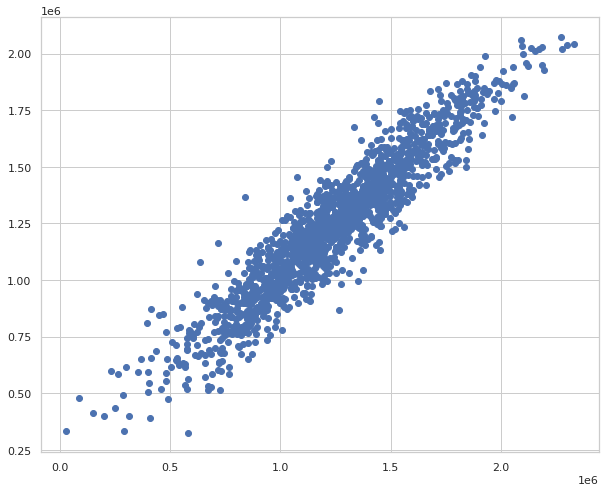

In [14]:
# scatter plot
plt.figure( figsize=(10,8) )
sns.set_theme(style="whitegrid")
plt.scatter(y_test, predictions)

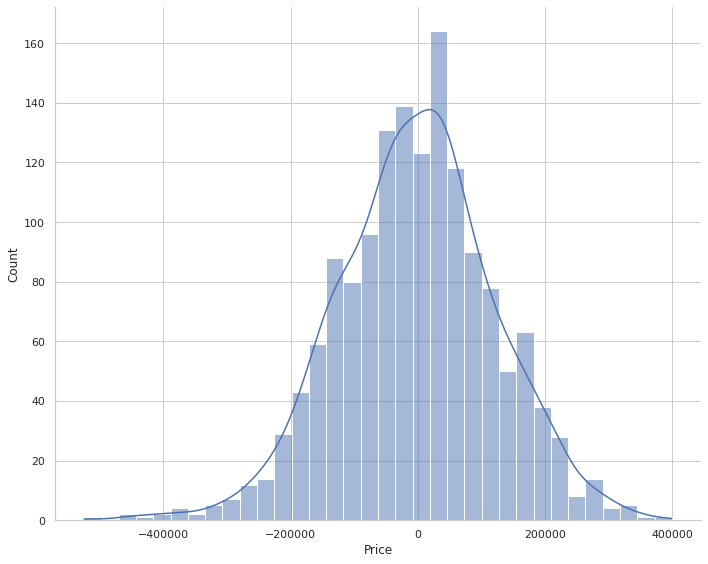

In [15]:
# distribution plot
sns.set_theme(style="whitegrid")
sns.displot((y_test - predictions), 
            kind='hist',
            kde=True,
            height=8, 
            aspect=10/8 
          )

<br>

## c. Evaluation Metrices : MAE, MSE, RMSE

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
# Mean Absolute Error
mae = mean_absolute_error(y_test, predictions)
print(f'The Mean-Absolute-Error is : {mae}')

The Mean-Absolute-Error is : 96646.61077770658


In [18]:
# Mean Squared Error
mse = mean_squared_error(y_test, predictions)
print(f'The Mean-Squared-Error is : {mse}')

The Mean-Squared-Error is : 15228581247.25427


In [19]:
# Root Mean Squared Error
rmse = np.sqrt(mse)
print(f'The Root-Mean-Squared-Error is : {rmse}')

The Root-Mean-Squared-Error is : 123404.13788546262


<br>

## d. Prediction on New Data

**Creating data**

In [20]:
# defining data position
pos = 289

# collecting data from dataframe - df
new_data = df.iloc[pos]

# reshaping the data
new_data = new_data.values.reshape(-1, 5)

# scaling the data using scaler()
new_data = scaler.transform( new_data )

# extracting true result
true_result = target[pos]

<br>

**Predicting Result for Created Data**

In [21]:
# predicting result for new_data
predicted_result = model.predict(new_data)

# extracting the predicted class
predicted_result = predicted_result[0]

<br>

**Comparing True and Predicted Results**

In [22]:
# extracting predicted class name
print(f'\n The predicted result is : {predicted_result}')

# extracting actual class name
print(f'\n The actual result is : {true_result}')


 The predicted result is : 815618.5991101383

 The actual result is : 861321.5806924718


<br>
<br>

---

<br>

# Save the model


```
# defining the name of the model
modelName = 'model.h5'

# creating the path
path = 'model_directory/' + modelName

# save model
model.save( path )
```



<br>

# Load the model


```
# defining the name of the model
modelName = 'model.h5'

# creating the path
path = 'model_directory/' + modelName

# loading saved models
from tensorflow.keras.models import load_model
model = load_model( path )
```

